# ML project for building an image classifier for rock paper scissors game using CNN.

Downlaoding the dataset:

https://www.tensorflow.org/datasets/catalog/rock_paper_scissors

In [2]:
# Training dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps.zip \
    -O /tmp/rps.zip

# Testing dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2023-09-08 10:03:49--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.207, 172.217.218.207, 142.251.31.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  25.2MB/s    in 8.5s    

2023-09-08 10:03:58 (22.5 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2023-09-08 10:03:58--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.207, 172.217.218.207, 142.251.31.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tm

In [17]:
# Unzipping the dataset
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [8]:
pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00


In [9]:
#importing the keras liberaries
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [16]:
# Create a data generator for training
TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Create a data geneartor for test and validation
VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [14]:
# Create the model

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Observing the layers of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [21]:
# Compiling the model to check the accuracy

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Epoch 1/10
20/20 [==============================] - 262s 13s/step - loss: 1.1043 - accuracy: 0.3444 - val_loss: 1.0935 - val_accuracy: 0.5860
Epoch 2/10
20/20 [==============================] - 241s 12s/step - loss: 1.0806 - accuracy: 0.3992 - val_loss: 0.9143 - val_accuracy: 0.4785
Epoch 3/10
20/20 [==============================] - 256s 13s/step - loss: 1.0015 - accuracy: 0.4988 - val_loss: 0.6941 - val_accuracy: 0.6129
Epoch 4/10
20/20 [==============================] - 230s 11s/step - loss: 1.1212 - accuracy: 0.5000 - val_loss: 0.6272 - val_accuracy: 0.7930
Epoch 5/10
20/20 [==============================] - 244s 12s/step - loss: 0.7803 - accuracy: 0.6274 - val_loss: 0.5878 - val_accuracy: 0.6720
Epoch 6/10
20/20 [==============================] - 229s 11s/step - loss: 0.7281 - accuracy: 0.6802 - val_loss: 0.3084 - val_accuracy: 0.9032
Epoch 7/10
20/20 [==============================] - 229s 11s/step - loss: 0.5786 - accuracy: 0.7464 - val_loss: 0.2916 - val_accuracy: 0.9409
Epoch 

As it shows, the accuracy of the training data is higher than the accuracy of the validation data. Which indicates the model is overfitted. In other words, the model is very good at detecting the trained dataset but it is not performing well when it is shown new or unseen data.

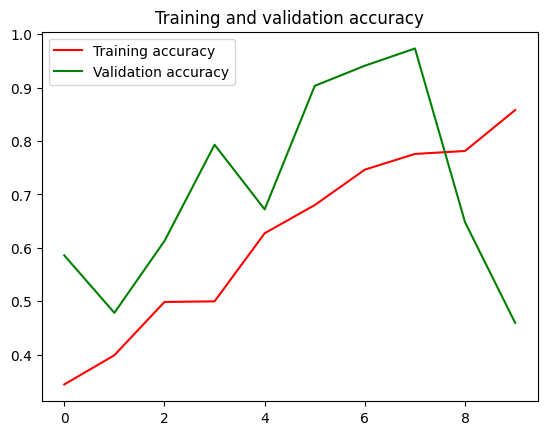

<Figure size 640x480 with 0 Axes>

In [22]:
# plotting training and validation accuracy
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

The code below fetches the previous two images from each category based on the pic_index and stores their file paths in separate lists.

In [23]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock07-k03-009.png', 'rock06ck02-015.png', 'rock05ck01-109.png', 'rock07-k03-100.png', 'rock02-067.png', 'rock01-054.png', 'rock03-097.png', 'rock05ck01-017.png', 'rock07-k03-091.png', 'rock06ck02-118.png']
['paper03-107.png', 'paper02-071.png', 'paper05-096.png', 'paper07-043.png', 'paper06-106.png', 'paper05-014.png', 'paper04-015.png', 'paper07-021.png', 'paper07-094.png', 'paper07-022.png']
['testscissors01-031.png', 'scissors01-051.png', 'testscissors01-092.png', 'testscissors01-003.png', 'scissors03-061.png', 'scissors02-102.png', 'scissors04-037.png', 'scissors01-116.png', 'scissors03-103.png', 'scissors02-047.png']


/tmp/rps/rock/rock07-k03-009.png


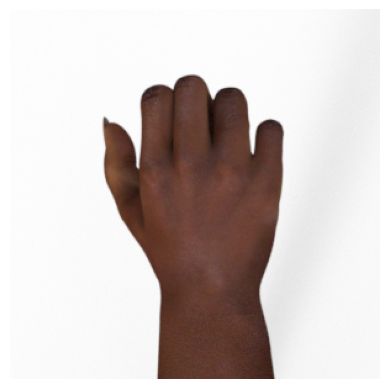

/tmp/rps/rock/rock06ck02-015.png


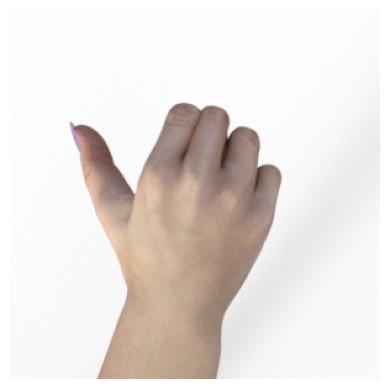

/tmp/rps/paper/paper03-107.png


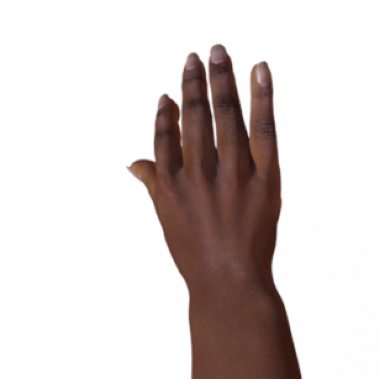

/tmp/rps/paper/paper02-071.png


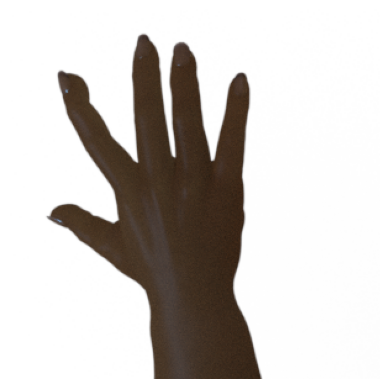

/tmp/rps/scissors/testscissors01-031.png


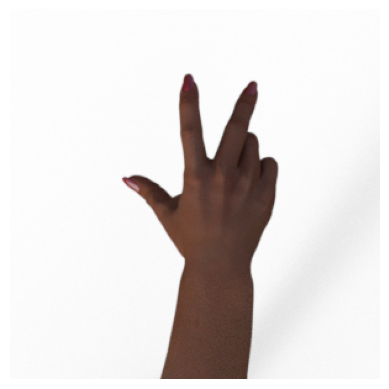

/tmp/rps/scissors/scissors01-051.png


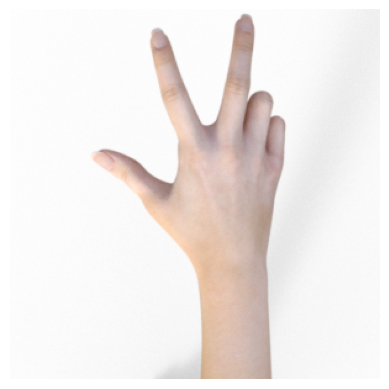

In [24]:
pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import keras.utils as image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = tf.keras.utils.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving sss.png to sss.png
1/1 [==============================] - 0s 41ms/step
sss.png
[[0. 0. 1.]]
